### <font color="Red">3.2 Gamma校正 程式設計</font>
<font color="Red"> 1. 先建立浮點數的影像矩陣     
    2. 再使用 np.power(image,gamma) 進行 gamma 計算
    
https://makeronsite.com/opencv-python-use-gamma-correction.html
    

3


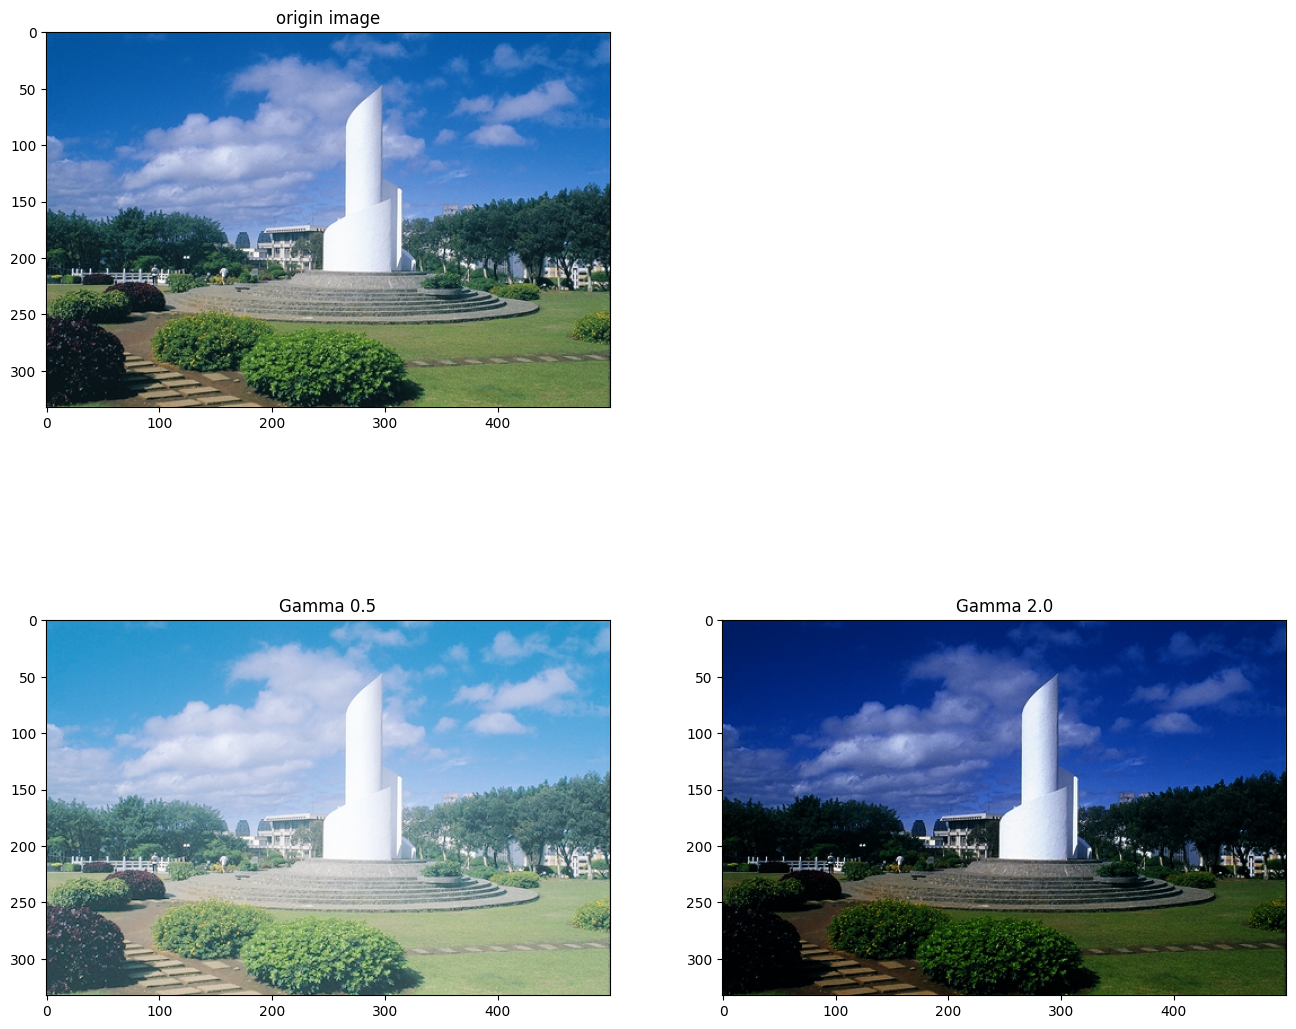

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gamma_correction( f, gamma = 2.0 ):
#------------------- Code Here ------------------#     
    g = f.copy()
    nr,nc = f.shape[:2]
    c = 255 / (255.0 ** gamma)
    table = np.zeros(256)
    
    for i in range(256):
        table[i] = round(i ** gamma * c, 0)
    for x in range(nr):
        for y in range(nc):
            for k in range(3):
                g[x, y, k] = table[f[x, y, k]]
#------------------- Stop Here ------------------#     
    return g

def main( ):
    imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    print(img.ndim)
    img1 = gamma_correction( img, 0.5 )
    img2 = gamma_correction( img, 2.0 )
    plt.figure(figsize=(16, 14))
    plt.subplot(2,2,1)   
    plt.title('origin image') 
    plt.imshow(img)
    plt.subplot(2,2,3)     
    plt.title('Gamma 0.5') 
    plt.imshow(img1)
    plt.subplot(2,2,4)     
    plt.title('Gamma 2.0') 
    plt.imshow(img2)
     
main( )

  
### <font color="Red">3.4 應用 Beta Correcrtion 到影像中</font>
<font color="Red">1. 先利用 special.betainc 設定對應函數t     
2. 再利用 t[f] 應用到影像 f 中

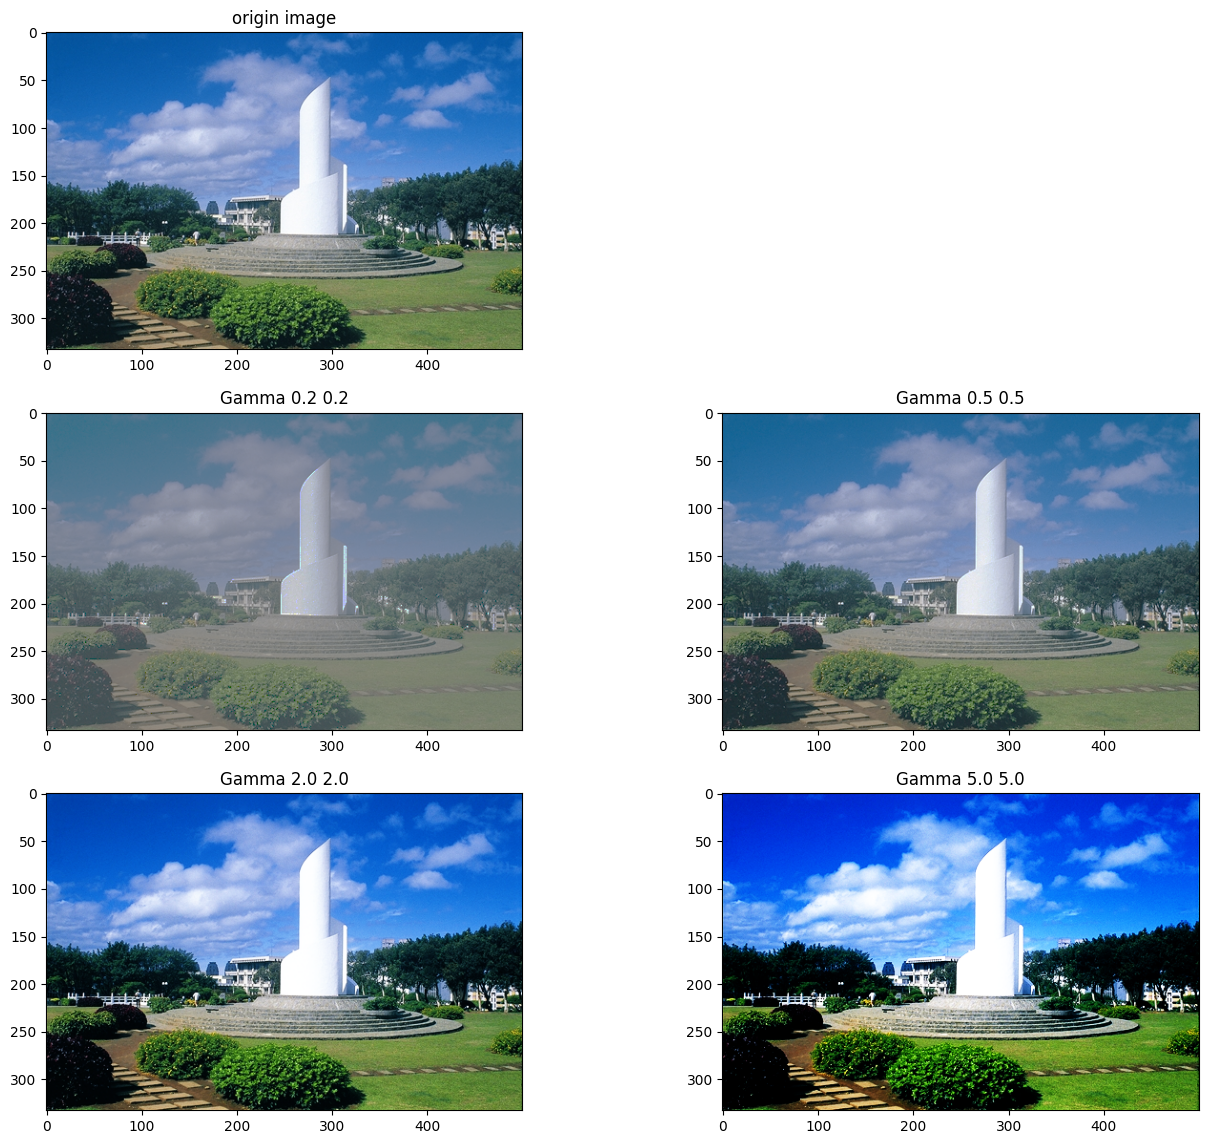

In [3]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

def beta_correction( f, a = 2.0, b = 2.0 ):
#------------------- Code Here ------------------#  
    g = f.copy()
    nr,nc = f.shape[:2] 
    c = np.linspace(0, 1, 256)
    table = np.round(special.betainc(a, b, c) * 255, 0)
    
    for x in range(nr):
        for y in range(nc):
            for k in range(3):
                g[x, y, k] = table[f[x, y, k]]  
#------------------- Stop Here ------------------#
    return g

def main( ):
    imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    img1 = beta_correction( img, a = 0.2, b = 0.2 )
    img2 = beta_correction( img, a = 0.5, b = 0.5 )
    img3 = beta_correction( img, a = 2.0, b = 2.0 )
    img4 = beta_correction( img, a = 5.0, b = 5.0 )

    plt.figure(figsize=(16, 14))
    plt.subplot(3,2,1)   
    plt.title('origin image') 
    plt.imshow(img)
    plt.subplot(3,2,3)     
    plt.title('Gamma 0.2 0.2') 
    plt.imshow(img1)
    plt.subplot(3,2,4)     
    plt.title('Gamma 0.5 0.5') 
    plt.imshow(img2)
    plt.subplot(3,2,5)     
    plt.title('Gamma 2.0 2.0') 
    plt.imshow(img3)
    plt.subplot(3,2,6)     
    plt.title('Gamma 5.0 5.0') 
    plt.imshow(img4)
    
main( )

### <font color="Red">3.5 調整影像的對比和亮度

<font color="Red">轉換公式如下：     
new_image = (old_image) × (contrast/127 + 1) - contrast + brightness 

<font color="Red">利用調整 contrast (對比) 和 brightness (亮度) 參數值，能改變影像的對比度和亮度

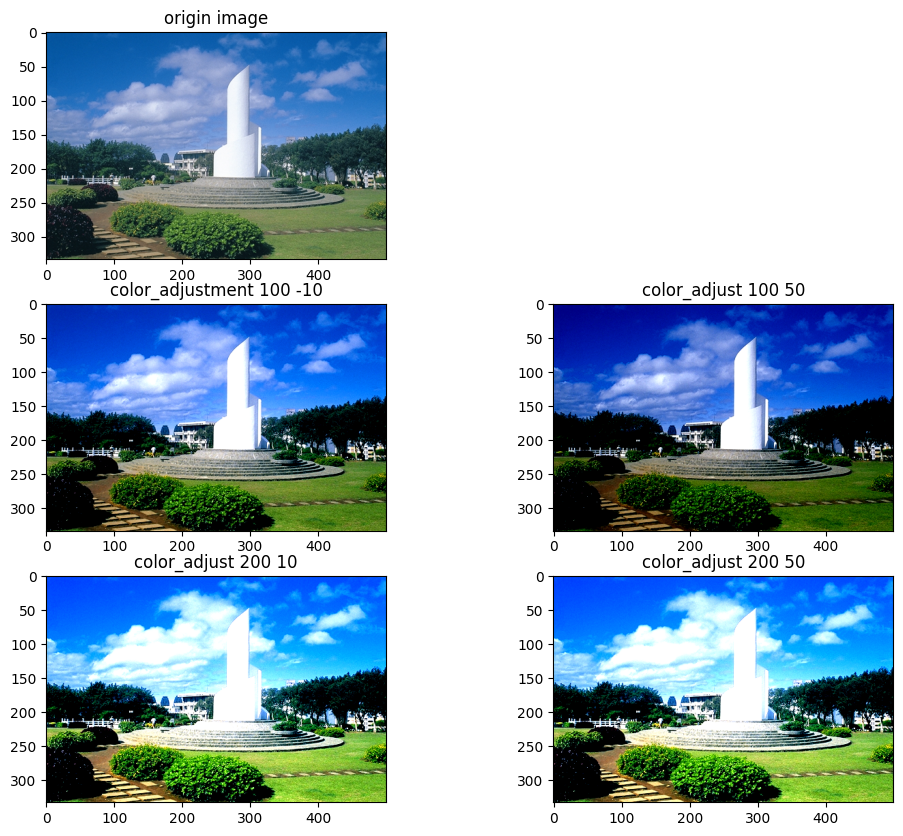

In [5]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

def color_adjustment( f, contrast, brightness ):
#------------------- Code Here ------------------#      
    nr,nc = f.shape[:2]
    g = np.zeros((nr, nc, 3), np.int16)
    g = f * (contrast/127 + 1) - contrast + brightness
#------------------- Stop Here ------------------#  
    g = np.clip(g, 0, 255)
    g = np.uint8(g)
    return g

def main( ):
    imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    img1 = color_adjustment( img, 100, -10 )
    img2 = color_adjustment( img, 100, -50)  
    img3 = color_adjustment( img, 200, 10) 
    img3 = color_adjustment( img, 200, 50)     
    plt.figure(figsize=(12, 10))
    plt.subplot(3,2,1)   
    plt.title('origin image') 
    plt.imshow(img)
    plt.subplot(3,2,3)     
    plt.title('color_adjustment 100 -10') 
    plt.imshow(img1)
    plt.subplot(3,2,4)     
    plt.title('color_adjust 100 50') 
    plt.imshow(img2)
    plt.subplot(3,2,5)     
    plt.title('color_adjust 200 10') 
    plt.imshow(img3)
    plt.subplot(3,2,6)     
    plt.title('color_adjust 200 50') 
    plt.imshow(img3)    
main( )

### <font color="Red"> 3.6 Histogram <p>
<a href="https://jason-chen-1992.weebly.com/home/-histogram-equalization">  影像直方圖與直方圖均化</a>    

<a href="https://blog.gtwang.org/programming/python-opencv-matplotlib-plot-histogram-tutorial/">  指令：cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍) </a> 
    
<font color="Red"> 下列程式提供彩色的處理方式，請完成灰階影像的程式   

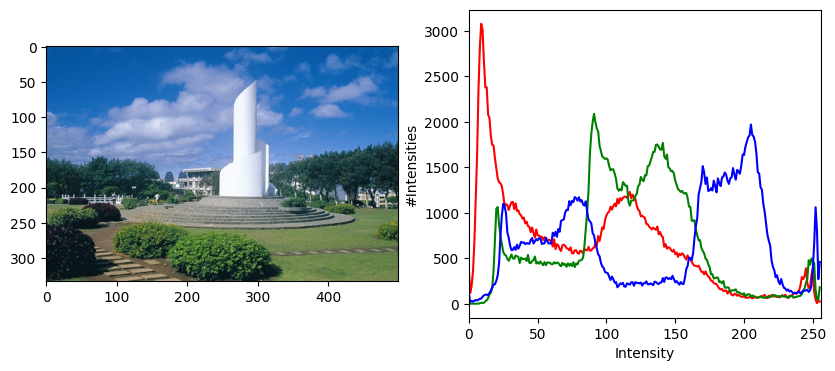

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 
    
    if f.ndim == 3:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( [f], [i], None, [256], [0,256] )
            plt.plot( hist, color = col)
            plt.xlim( [0,256] )
    else:
#------------------- Code Here ------------------#  
        hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
        plt.plot( hist )
#------------------- Stop Here ------------------#     
     
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

def main( ):
#    img = cv2.imread( "Lenna.bmp", -1 )
    imgBGR = cv2.imread( "Commons.jpeg", -1 )
    img = imgBGR[:,:,::-1]
    histogram( img )

main( )

### <font color="Red"> 3.8 彩色影像直方圖均化(Histogram Equalization)
<font color="Red"> 延續3.7的灰色影像直方圖均化    
擴展至彩色影像直方圖均化上    

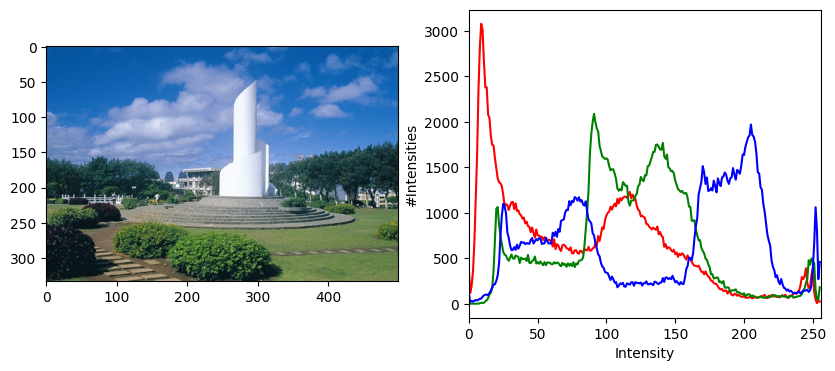

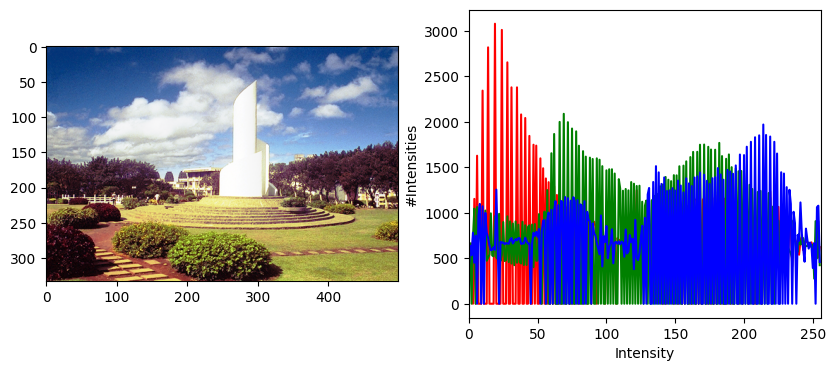

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 

    if f.ndim == 3:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( [f], [i], None, [256], [0,256] )
            plt.plot( hist, color = col)
            plt.xlim( [0,256] )     

    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )
    
imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
histogram( img )  

#------------------- Code Here ------------------# 
for i in range(3):
    img[:,:,i] = cv2.equalizeHist(img[:,:,i])
#------------------- Stop Here ------------------# 

histogram( img )  


###  <font color="Red"> 3.11 影像模糊的比較
    
    
<font color="Red"> 請比較下列不同模糊方法在 7x7  15x15 的過濾結果    
blur() 平均模糊    
GaussianBlur() 高斯模糊     
medianBlur() 中值模糊      
<a href="https://steam.oxxostudio.tw/category/python/ai/opencv-blur.html">  影像模糊</a>     

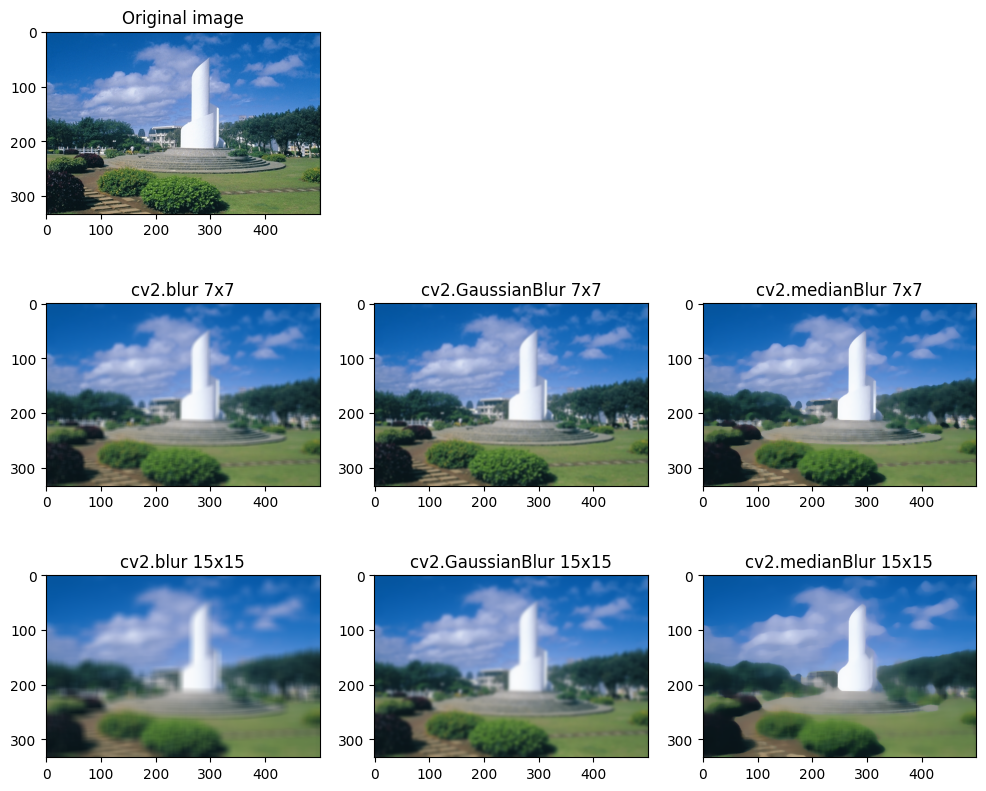

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]

#------------------- Code Here ------------------# 
img2 = cv2.blur( img1, ( 7, 7 ) )
img3 = cv2.blur( img1, ( 15, 15 ) )
img4 = cv2.GaussianBlur(img1, (7, 7), 0) 
img5 = cv2.GaussianBlur(img1, (15, 15), 0) 
img6 = cv2.medianBlur(img1, 7)
img7 = cv2.medianBlur(img1, 15)
#------------------- Stop Here ------------------# 

plt.figure(figsize=(12,10))
plt.subplot(3,3,1)     
plt.title('Original image') 
plt.imshow(img1)
plt.subplot(3,3,4)     
plt.title('cv2.blur 7x7') 
plt.imshow(img2)
plt.subplot(3,3,7)     
plt.title('cv2.blur 15x15') 
plt.imshow(img3)
plt.subplot(3,3,5)     
plt.title('cv2.GaussianBlur 7x7') 
plt.imshow(img4)
plt.subplot(3,3,8)     
plt.title('cv2.GaussianBlur 15x15') 
plt.imshow(img5)
plt.subplot(3,3,6)     
plt.title('cv2.medianBlur 7x7') 
plt.imshow(img6)
plt.subplot(3,3,9)     
plt.title('cv2.medianBlur 15x15') 
plt.imshow(img7)

### <font color="Red"> 3.15 請找到對 Commons.jpeg 最合適的 Sobel, Laplacian, Canny 邊緣偵測參數

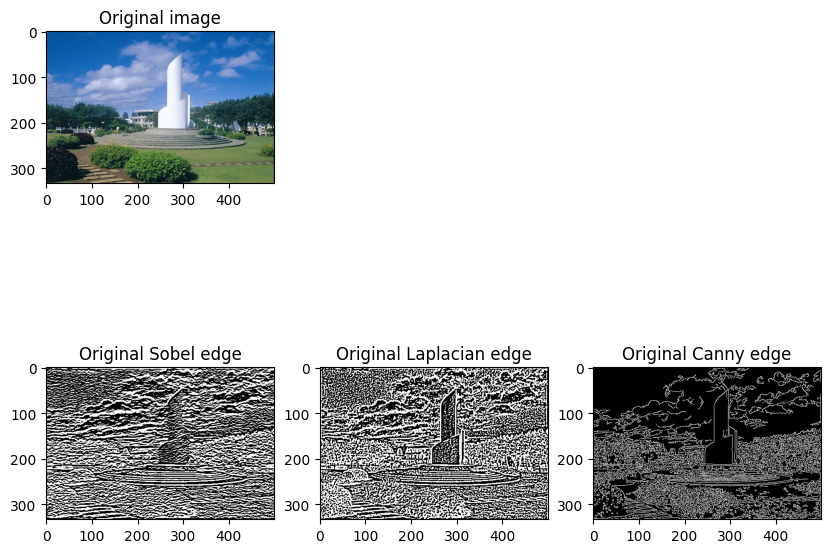

In [170]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
#------------------- Code Here ------------------# 
imgGRAY  = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.Sobel(imgGRAY, -1, 0, 2, 1, 7)
img3 = cv2.Laplacian(imgGRAY, -1, 1, 7)
img4 = cv2.Canny(img1, 36, 100)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,3,4)     
plt.title('Original Sobel edge') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,3,5)     
plt.title('Original Laplacian edge') 
plt.imshow(img3, cmap=plt.cm.gray)
plt.subplot(2,3,6)     
plt.title('Original Canny edge') 
plt.imshow(img4, cmap=plt.cm.gray)

#------------------- Stop Here ------------------# 

###  <font color="Red"> 3.17 請利用 Sobel, Canny 邊界來增強 cv2.medianBlur(img, 37) 處理後的 Commons.jpeg 影像

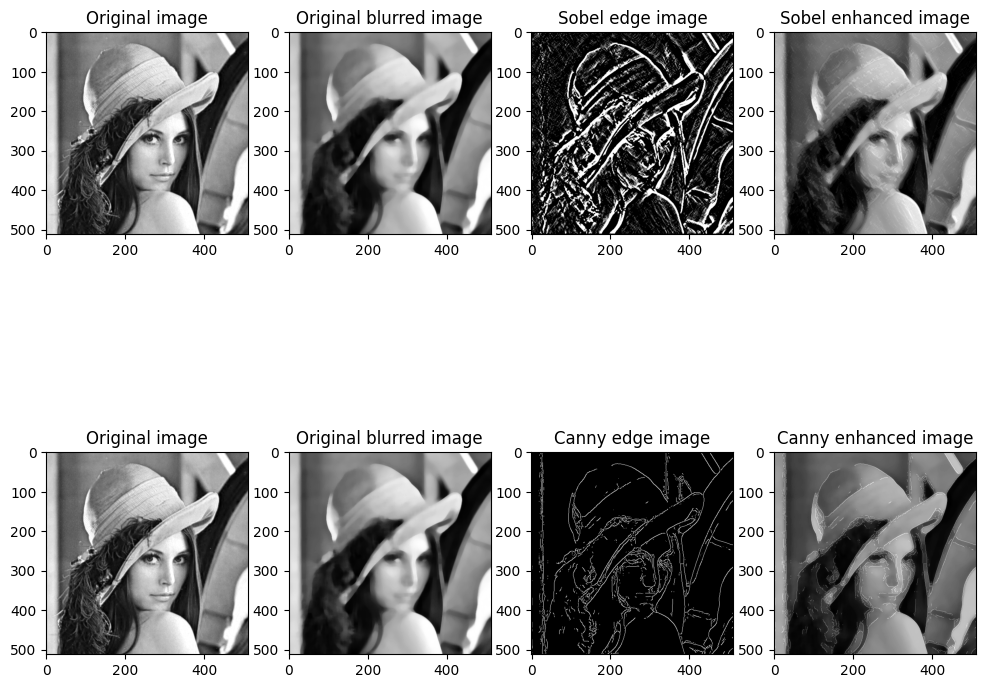

In [205]:
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.medianBlur(img1, 15)   
#------------------- Code Here ------------------#
img3 = cv2.Sobel(img2, -1, 1, 1, 1, 7)
img4 = cv2.addWeighted(img2, 0.9, img3, 0.1, -20)
img5 = cv2.Canny(img2, 36, 36)
img6 = cv2.addWeighted(img2, 0.8, img5, 0.3, -10)
#------------------- Stop Here ------------------# 
plt.figure(figsize=(12,10))
plt.subplot(2,4,1)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,4,2)     
plt.title('Original blurred image') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,4,3)     
plt.title('Sobel edge image') 
plt.imshow(img3, cmap=plt.cm.gray)
plt.subplot(2,4,4)     
plt.title('Sobel enhanced image') 
plt.imshow(img4, cmap=plt.cm.gray)
plt.subplot(2,4,5)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,4,6)     
plt.title('Original blurred image') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,4,7)     
plt.title('Canny edge image') 
plt.imshow(img5, cmap=plt.cm.gray)
plt.subplot(2,4,8)     
plt.title('Canny enhanced image') 
plt.imshow(img6, cmap=plt.cm.gray)